# HaMLeT

## Session 3: Feature Extraction

### Goals of this Session

In this session you will ...
* get an understanding of why feature descriptors are superior to raw data
* be able to think of abstract representations of image data
* have implemented a feature descriptor on your own
* have gotten to know several common descriptors
* have used feature representations for image classifciation

### Local Binary Pattern

Local Binary Pattern is a simple feature descriptor. It compares the eight neighbouring pixel values to the center pixel value -- if it's larger, the value 1 is assigned to this pixel and 0 otherwise. The resulting 8 bit number is stored as an integer (in the range of 0--255). This is the local feature descriptor for a single pixel. For this exercise, the least significant bit should be in the upper right corner and the significance increases clockwise.

Useful hints:
* `2 ** 7` computes 2^7.
* There is `+=` operator in python!

**Task:** Implement Local Binary Pattern and test it on a few random 3x3 matrices.

In [ ]:
import numpy as np

def local_binary_pattern(input_matrix):
    # input matrix is a numpy array of size 3 x 3
    # return value should be an integer number between 0 and 255.
    center_val = input_matrix[1,1]
    position = [(0,0),(0,1),(0,2),(1,2),(2,2),(2,1),(2,0),(1,0)]
    i = 0
    lbp = 0
    for pos in position:
        if center_val < input_matrix[pos[0],pos[1]]:
            #print("mat val=",input_matrix[pos[0],pos[1]])
            lbp += 2 ** i
            
        i+=1
    
    
    return lbp

# Test with some random numbers
for i in range(5):
    random_matrix = np.random.randint(255, size=(3, 3))
    lbp = local_binary_pattern(random_matrix)
    print('Random Matrix:\n', random_matrix, '\nLBP: ', lbp, '\n')

Now we'd like to use this local feature descriptor to convert an entire image to a more compact representation of itself. Often, LBP is used with a histogram.

Useful hints:

* `numpy` has a `histogram` function!
* Use the for-loop and ignore the border pixels (no padding required)

**Task:** Implement Local Binary Pattern for a whole image. 

In [ ]:
def local_binary_pattern_histogram(input_image):
    # input_image is an image of arbitrary size
    # return a 256 entires long list or array that contains 
    # the local binary pattern histogram values.
    lbp_list = list()
    for i in range(1, input_image.shape[0] - 1):
        for j in range(1, input_image.shape[1] - 1):
            # your code here
            lbp_list.append(local_binary_pattern(input_image[i-1:i+2,j-1:j+2]))
                            
    histgrm = np.histogram(lbp_list,bins=np.arange(257))
    return histgrm[0]

In [ ]:
%matplotlib inline
import cv2
from matplotlib import pyplot

# this is just a sample image (and we'll only take the first channel
# as it's grayscale, it's the same as the other two channels anyway)
sample_image = cv2.imread('sample.jpg')[:, :, 0]
hist = local_binary_pattern_histogram(sample_image)


pyplot.bar(range(256), hist)


Now we have an abstract representation of our image! Instead of using 512 x 512 = 262'144 raw intensity values, we've condensed the image into a feature vector of length 256.



### Classification 

We'd like to use feature descriptors such as LBP for image classification. In this section you'll apply feature descriptors to images and use a simple classifier to assign one of two classes to the image.

Before we can start, we have to overcome a few challenges. First of all, the dataset contains images of arbitrary size. Usually, you either extract images from patches with a fixed size or you implement feature detectors that are size independent. The latter can be done for example by normalising the histogramm. Normalising / scaling feature values is generally a good practise.

**Task**: Write a normalisation method that normalises a given histogram.

In [ ]:
def normalise_histogram(hist):
    #meanVal = hist.mean()
    #varianceVal = hist.var()
    #stdVal = hist.std()
    
    #normalised_histogram = normalized = (hist-min(hist))/(max(hist)-min(hist))
    #print(normalised_histogram)
    normalised_histogram = hist / np.sum(hist)
    return normalised_histogram

In [5]:
normalise_histogram(hist)

array([  6.57862361e-02,   5.10188389e-03,   1.06343714e-02,
         9.84621300e-03,   5.50173010e-03,   7.03575548e-04,
         1.02306805e-02,   1.77162630e-02,   1.24067666e-02,
         1.31103422e-03,   1.32641292e-03,   1.64552095e-03,
         1.05805459e-02,   8.07381776e-04,   2.06689735e-02,
         2.74855825e-02,   4.99807766e-03,   7.53556324e-04,
         1.05344098e-03,   1.23029604e-03,   5.95924644e-04,
         1.19184929e-04,   7.49711649e-04,   1.06497501e-03,
         9.58861976e-03,   1.13802384e-03,   1.21491734e-03,
         1.52633602e-03,   1.77277970e-02,   1.05344098e-03,
         2.83967705e-02,   1.59092657e-02,   1.02114571e-02,
         1.03037293e-03,   9.72702807e-04,   7.95847751e-04,
         9.68858131e-04,   1.65321030e-04,   8.68896578e-04,
         7.57401000e-04,   1.34948097e-03,   2.15301807e-04,
         1.11495579e-04,   1.03806228e-04,   1.51864667e-03,
         1.46097655e-04,   5.80545944e-04,   7.42022299e-04,
         9.70780469e-03,

We're going to use this, but we'll also extract image patches (some methods later require that). In this case, we'll extract only one large, square patch per image and resize it to a fixed size.

Here is a method that preprocesses the image by 
* converting to grayscale
* extracting a square patch from the centre
* resize the patch to a given fixed size.

Take a look at it to see how it works.

In [17]:
def extract_patch(input_image, fixed_size=256):
    gray_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)
    tmp_size = min(gray_image.shape)
    offsets = [(gray_image.shape[i] - tmp_size) // 2 for i in (0, 1)]
    patch = gray_image[offsets[0]: offsets[0] + tmp_size, offsets[1]: offsets[1] + tmp_size]
    return cv2.resize(patch, (fixed_size, fixed_size))

See how it works with a sample image.

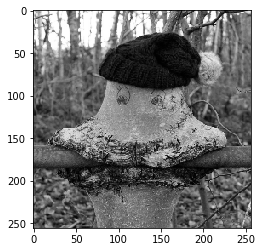

In [18]:
sample_image = cv2.imread('sample_large.jpg')
patch = extract_patch(sample_image)
pyplot.imshow(patch, cmap='gray')

Now, let's load our dataset!
We'll use [CalTech 101](http://www.vision.caltech.edu/Image_Datasets/Caltech101) dataset, which contains images from 101 classes of object. For this task, we'll try to create a classifier that can distinguish soccer balls and pyramids. Here is a method that returns four list of image data: two with labels (0 = emu, 1 = mayfly) and two with the actual images for training and testing, respectively.

In [19]:
import os, glob
def load_dataset(train_percentage=0.7, maxnum=1000):
    images, labels = [], []
    for labelNum, labelName in enumerate(['emu', 'mayfly']):
        cnt = 0
        image_list = glob.glob(os.path.join('101_ObjectCategories', labelName, '*.jpg'))
        for imagePath in image_list[:maxnum]:
            images.append(cv2.imread(imagePath))
            labels.append(labelNum)
            cnt += 1
        print('Loaded ', cnt, ' images of class ', labelName)
    np.random.seed(11)
    np.random.shuffle(images)
    np.random.seed(11)
    np.random.shuffle(labels)
    split = int(len(labels) * train_percentage)
    return np.array(images[:split]), np.array(labels[:split]), np.array(images[split:]), np.array(labels[split:])

train_data, train_labels, test_data, test_labels = load_dataset()

Loaded  53  images of class  emu
Loaded  40  images of class  mayfly


Let's visualise a few of these images!

mayfly
emu
emu
emu


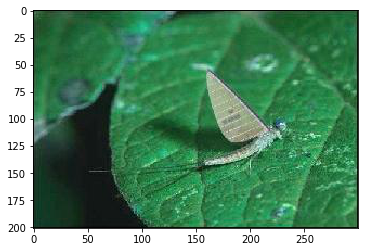

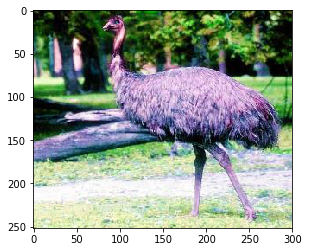

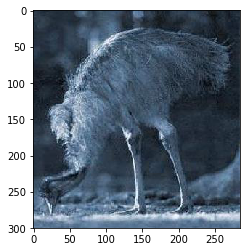

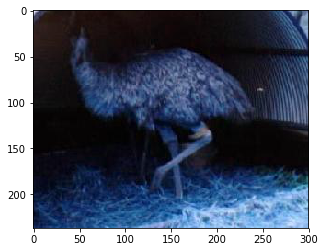

In [20]:
label_names = ['emu', 'mayfly']

print(label_names[train_labels[0]])
print(label_names[test_labels[0]])
print(label_names[train_labels[1]])
print(label_names[test_labels[1]])

pyplot.figure()
pyplot.imshow(train_data[0])

pyplot.figure()
pyplot.imshow(test_data[0])

pyplot.figure()
pyplot.imshow(train_data[1])

pyplot.figure()
pyplot.imshow(test_data[1])

**Task:** convert the train and test data into a suitable format and apply feature extraction with a normalised local binary pattern histogram. For a good trade-off between computational performance and accuracy, use an image size of 256 x 256 pixels.

Useful hints:

* data is a list of images -- for each item in the list, extract the patch and compute the feature vector of the patch
* list comprehensions are amazing: `new_list = [operation(item) for item in old_list]` should be really useful!

In [21]:
def create_feature_vectors(data):
    # data is a list of images, feature_data is a list of corresponding feature vectors
    feature_data = [normalise_histogram(local_binary_pattern_histogram(extract_patch(image))) for image in data]
    
    return feature_data

train_features = np.array(create_feature_vectors(train_data))
test_features = np.array(create_feature_vectors(test_data))

Alright, let's get to the fun part: Classification! You know how to handle this, the only difference is that we'll use our own features extracted from images instead of precomputed ones. Don't worry if the numbers have no real meaning to you anymore -- as long as they provide a good separation between the classes, we'll be fine!

**Task:** Implement methods to train and test classification using feature descriptors with an SVM!

Useful hints:

* you can write methods on your own, but `sklearn` has stuff like `sklearn.preprocessing.StandardScaler` and `sklearn.metrics.accuracy_score` built in already!

In [22]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score 

def train_and_test(train_data, train_labels, test_data, test_labels):
    # use a linear SVM, a StandardScaler and return the accuracy!
    clf = SVC(kernel='linear')
    scaler = StandardScaler()
    transData = scaler.fit_transform(train_data)
    clf.fit(transData,train_labels)
    transTestData = scaler.transform(test_data)
    y_pred = clf.predict(transTestData)  
    return accuracy_score(test_labels,y_pred)

print('Test Features')
train_and_test(train_features, train_labels, test_features, test_labels)

Test Features


0.8928571428571429

Let's compare that to the original raw data!

In [23]:
train_raw = [extract_patch(datum, fixed_size=256).reshape(-1) for datum in train_data]
test_raw = [extract_patch(datum, fixed_size=256).reshape(-1) for datum in test_data]

print('Test Raw')
train_and_test(train_raw, train_labels, test_raw, test_labels)


Test Raw


0.6071428571428571

Apparently, we're at least a little better than raw data. 

Let's check some other feature descriptors. Many of them are already implemented, for example in `scikit image`. Let's check their implementation of the LBP feature descriptor.

**Task:** Write a method that converts a list of images into a list of lbp features using the `skimage_lbp` method. Read up in the documentation about variations and implement a `uniform` version. Remember to also implement histogram functions with arbitrary lengths, as the `uniform` variant returns fewer than 256 bins.

Test Features


0.8214285714285714

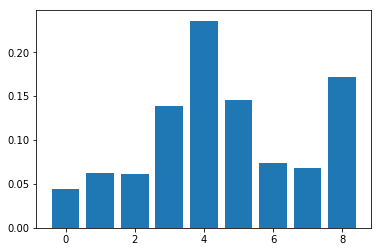

In [24]:
from skimage.feature import local_binary_pattern as skimage_lbp


def skimage_lbp_histogram(input_image):
    # input_image is an image of arbitrary size
    # return a 256 entires long list or array that contains the 
    # local binary pattern histogram values.
    METHOD = 'uniform'
    P = 8
    R = 1
    lbp = skimage_lbp(input_image,P,R,METHOD)
    lbp_histogram,_ = np.histogram(lbp,normed = True, bins=np.arange(0,np.max(lbp)+1))
    return lbp_histogram

def create_feature_vectors(data):
    # data is a list of images, feature_data is a list of corresponding feature vectors
    # list comprehensions are a pythonic way to handle lists, btw. It might come in handy here!
    feature_data = [skimage_lbp_histogram(extract_patch(image)) for image in data]
    return feature_data

sample_image = cv2.imread('sample.jpg')[:, :, 0]
hist = skimage_lbp_histogram(sample_image)
pyplot.bar(range(len(hist)), hist)

train_features = np.array(create_feature_vectors(train_data), dtype=np.float64)
test_features = np.array(create_feature_vectors(test_data), dtype=np.float64)

print('Test Features')
train_and_test(train_features, train_labels, test_features, test_labels)

**Task:** Use the new features to perform classification. 

*Question: Even if the results with feature descriptors are slightly poorer (which may also be due to a small and unsuitable training set), applying features has several advantages. Use the `uniform` version of LBP to explain some of them.*

**Your answer:** ...



### More Feature Descriptors

In image processing, there are several feature descriptors that common and already implemented -- just like the LBP descriptor you saw earlier. 

**Task:** Try the HOG feature descriptor. How well does it perform? Use the `visualise=True` parameter and visualise the result of the feature descriptor.

*Question:* What do you see, how can you interpret the HOG features? What is your opinion about the number of returned features?
**Your answer:** ...



/usr/local/anaconda3/lib/python3.6/site-packages/skimage/feature/_hog.py:150: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15. To supress this message specify explicitly the normalization method.
  skimage_deprecation)


81
Test Features


0.7857142857142857

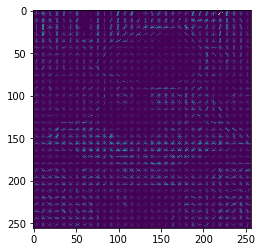

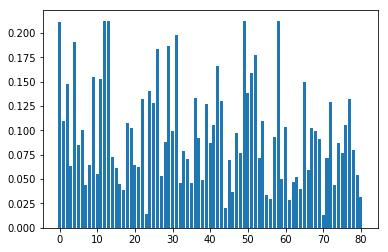

In [25]:
from skimage.feature import hog as skimage_hog

def create_feature_vectors(data):
    # data is a list of images, feature_data is a list of corresponding feature vectors
    feature_data = [skimage_hog(extract_patch(image, fixed_size=256)) for image in data]
    return feature_data


sample_image = cv2.imread('sample.jpg')
# implement img such that img is a representation of hog

fd, img = skimage_hog(extract_patch(sample_image, fixed_size=256), visualize=True)
pyplot.imshow(img)

hist = skimage_hog(extract_patch(sample_image, fixed_size=24), block_norm='L2-Hys')
print(len(hist))
pyplot.figure()
pyplot.bar(range(len(hist)), hist)

train_features = np.array(create_feature_vectors(train_data), dtype=np.float64)
test_features = np.array(create_feature_vectors(test_data), dtype=np.float64)

print('Test Features')
train_and_test(train_features, train_labels, test_features, test_labels)


Often, it is useful to combine several features into one larger feature detector.

**Task:** Combine HOG, LBP and your own feature detector in a useful way and see how it performs.

Useful hints:

* 'useful' in this case means concatenating lists
* you can concatenate two lists `list1` and `list2` into `list1` by using `extend`: `list1.extend(list2)`

/usr/local/anaconda3/lib/python3.6/site-packages/skimage/feature/_hog.py:150: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15. To supress this message specify explicitly the normalization method.
  skimage_deprecation)


72909
Test Features
0.785714285714


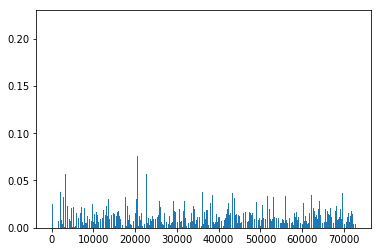

In [26]:
def combined_features(input_image):
    # compute a list that contains the entries of several feature vectors
    
    hist1 = skimage_lbp_histogram(extract_patch(input_image))
    
    hist2 = skimage_hog(extract_patch(input_image, fixed_size=256))
    
    #hist3 = local_binary_pattern_histogram(input_image)
    
    
    
    
    
    combined_features = np.concatenate((hist1, hist2), axis=None)
    
    
    #feature_data = [skimage_lbp_histogram(extract_patch(image)) for image in data]
    
    #feature_data_lbp = [skimage_lbp_histogram(extract_patch(image)) for image in data]
    
    #feature_data_hog = [skimage_hog(extract_patch(image, fixed_size=256)) for image in data]
    
    #combined_features = feature_data_lbp.extend(feature_data_hog)
    
    return combined_features

def create_feature_vectors(data):
    # data is a list of images, feature_data is a list of corresponding feature vectors
    feature_data= [combined_features(image) for image in data]
    #feature_data_hog = [skimage_hog(extract_patch(image, fixed_size=256)) for image in data]
    #feature_data = feature_data_lbp.extend(feature_data_hog)
    return feature_data

sample_image = cv2.imread('sample.jpg')
hist = combined_features(sample_image)
print(len(hist))
pyplot.bar(range(len(hist)), hist)

train_features = np.array(create_feature_vectors(train_data), dtype=np.float64)
test_features = np.array(create_feature_vectors(test_data), dtype=np.float64)

print('Test Features')

print(train_and_test(train_features, train_labels, test_features, test_labels))

*Question:* You have used a StandardScaler (I hope). Why is this important -- particularly in this case?

**Your answer**: ...



### Bonus Exercises

If you're fast, there are some more interesting and challenging tasks for you! Here we go:

##### Some other SKImage Descriptors

**Task**: Try out other feature descriptors you find out, which are useful. Try to describe why / why not. You can find inspiration in this list of features (or useful methods to create features) in `skimage`: http://scikit-image.org/docs/dev/api/skimage.feature.html

In [27]:
from skimage.feature import greycomatrix as skimage_greycomatrix
from skimage.feature import daisy

def some_other_skimage_features(input_image):
    #features = []
    #features = skimage_greycomatrix(input_image, [1], [0, np.pi/4, np.pi/2, 3*np.pi/4], levels=4)
    descs, descs_img = daisy(input_image, step=180, radius=58, rings=2, histograms=6,
                         orientations=8, visualize=True)
    return descs
    
def create_feature_vectors(data):
    # data is a list of images, feature_data is a list of corresponding feature vectors
    #feature_data = []
    feature_data = [some_other_skimage_features(image) for image in data]
    
    return feature_data

sample_image = cv2.imread('sample.jpg')
hist = some_other_skimage_features(sample_image)
print(hist)

train_features = np.array(create_feature_vectors(train_data), dtype=np.float64)
test_features = np.array(create_feature_vectors(test_data), dtype=np.float64)


print('Test Features')
train_and_test(train_features, train_labels, test_features, test_labels)


ValueError: The parameter `img` must be a 2-dimensional array

*Question:* Based on the experiences you made in this session, what would you say are important properties of feature descriptors?

**Your answer:** ...



**Task**: Change the two classes `emu` and `mayfly` in the dataloader (just replace the name with any foldername in `101_ObjectCategories` on your drive) and see, which classes can be separated well with which kind of descriptor. How can you explain the differences?

##### LBP Extensions

There are several improvements to Local Binary Pattern, for example you could ...
* compare to other values than the center value (e.g. to the mean / median of the patch)
* use a larger radius than one to choose neighbour pixels
* use a look-up table for rotation invariance and other cool stuff (google for 'uniform local binary pattern')

**Task:** Implement one improvement to local binary pattern of your own choosing.

In [ ]:
def improved_local_binary_pattern(input_image):
    # input_image is an image of arbitrary size
    # return a list or array that contains the improved local binary pattern feature 
    # for the entire image
    ilbp = []
    return ilbp

Compare your descriptor against standard LBP and see how it performs!

In [ ]:
# You've written all the code necessary for this already. 
# Copy paste is a programmer's best friend ;-)

##### Your own descriptor

LBP is a rather simple feature descriptor, yet it is still often very effective. Think of other simple ways that could describe an image better than raw intensity values. 

**Task:** Implement a feature descriptor (or more general: a method that return a short list of values that describe an image) on your own!

In [ ]:
def my_own_feature_descriptor(input_image):
    feat = []
    return feat
    

**Task:** Perform classification with your own feature descriptor!

In [ ]:
# You've written all the code necessary for this already. 
# Copy paste is a programmer's best friend ;-)

# Feedback

Please give us some feedback about this session:

_enter feedback here_